In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')
 !ls -l /content/drive/'My Drive'

Mounted at /content/drive
total 16385
-rw------- 1 root root      181 Mar 25  2024  1-美国探亲访友邀请信参考（有美国亲戚朋友时才需提供）.gdoc
-rw------- 1 root root      181 Oct  1 19:31 'BME_DataLong (1).gsheet'
-rw------- 1 root root      181 Oct  1 17:52 'BME_DataLong (2).gsheet'
-rw------- 1 root root      181 Oct  1 19:39  BME_DataLong.gsheet
-rw------- 1 root root      181 Apr 25 06:13 'brief introduction.gdoc'
drwx------ 2 root root     4096 Mar 16  2023 'Colab Notebooks'
drwx------ 2 root root     4096 Sep 11 17:06 'data to download'
drwx------ 2 root root     4096 Aug  8 00:04 'normalize result'
drwx------ 2 root root     4096 Oct  1 17:54 'normalize result of MEP'
drwx------ 2 root root     4096 Aug 16 17:59 'saved file'
-rw------- 1 root root      181 Mar 22  2024 'sop-UCB (1).gdoc'
-rw------- 1 root root      181 Mar 22  2024 'sop-UCB (2).gdoc'
-rw------- 1 root root      181 Mar 22  2024 'sop-UCB (3).gdoc'
-rw------- 1 root root      181 Mar 22  2024  sop-UCB.gdoc
-rw------- 1 root root      181 O

In [ ]:
from google.colab import auth
import numpy as np
import matplotlib.pyplot as plt
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1LT-LywuXYAiTXjYgcKlePh3Rk3bWVY_aDGFH4RhrKDE/edit?gid=0#gid=0')
sheets = gsheets.worksheet('Sheet1').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])

In [ ]:
sub1 = df[df['Subj_ID']=='BME-03']['raw_MEP']
sub1 = sub1.astype(float)
sub2 = df[df['Subj_ID']=='BME-03']['raw_Intensity']
size1 = np.size(sub1)


import numpy as np
print('median value',np.median(sub1))
print('standard deviation',np.std(sub1))

median value 0.756073
standard deviation 0.6910656613552457


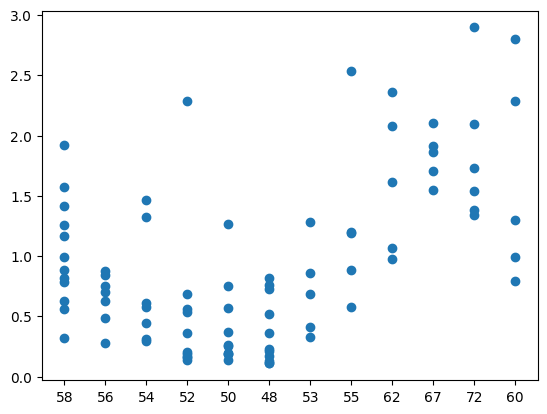

In [ ]:
import matplotlib.pyplot as plt
X = np.linspace(1,size1,size1)
plt.scatter(sub2,sub1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


size1 = np.size(sub1)
X = sub2.tolist()
X = np.array([float(X) for X in X])

Y = sub1.tolist()
Y = np.array([float(Y) for Y in Y])





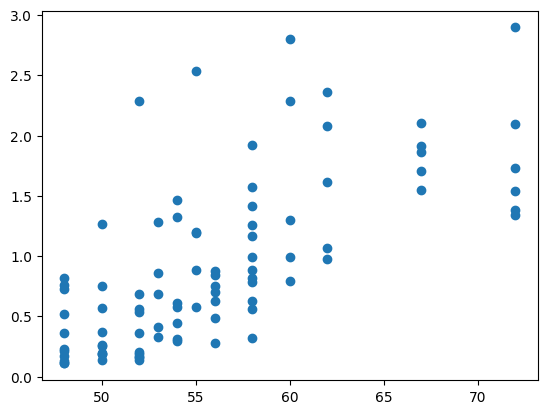

In [ ]:
plt.scatter(X,Y)

In [ ]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-09','BME-10','BME-11','BME-12','BME-13','BME-14','BME-15','BME-16','BME-17','BME-18','BME-20','BME-21','BME-22','BME-23','BME-24','BME-25','BME-26','BME-27','BME-28','BME-29']
num = np.size(ar)
r_squared = np.zeros((27,1))
r_mse = np.zeros((27,1))
k_value = np.zeros((27,1))
x0_value = np.zeros((27,1))
b_value = np.zeros((27,1))
L_value = np.zeros((27,1))
covariance = np.zeros((27,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [np.median(Y), np.median(X), 1, np.min(Y)]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses, maxfev=20000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b
<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b
<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b
<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b
<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b
<ipython-input-31-f67c285cbc65>:9: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-04','BME-05','BME-08','BME-09','BME-10','BME-12','BME-13','BME-14','BME-18','BME-20','BME-21','BME-22','BME-26','BME-28']
num = np.size(ar)
r_squared = np.zeros((num,1))
r_mse = np.zeros((num,1))
k_value = np.zeros((num,1))
x0_value = np.zeros((num,1))
b_value = np.zeros((num,1))
L_value = np.zeros((num,1))
covariance = np.zeros((num,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [np.median(Y), np.median(X), 0, np.min(Y)]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,  bounds=(0, 200), maxfev=30000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/new sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#sigmoid fit for 'BME-27','BME-29','BME-25''BME-06',,'BME-23'
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-04','BME-05','BME-06','BME-09','BME-13','BME-17','BME-20','BME-21','BME-23','BME-25','BME-26','BME-27','BME-29',]
num = np.size(ar)
r_squared = np.zeros((num,1))
r_mse = np.zeros((num,1))
k_value = np.zeros((num,1))
x0_value = np.zeros((num,1))
b_value = np.zeros((num,1))
L_value = np.zeros((num,1))
covariance = np.zeros((num,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [5, np.median(X), 1, 0]
  upper_bounds = [10,150,5,5]
  lower_bounds = [0,80,0,0]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,   bounds=(lower_bounds, upper_bounds), maxfev=30000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/new sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#'BME-04','BME-09''BME-05',
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-04','BME-05','BME-09','BME-13','BME-20','BME-21','BME-26']
num = np.size(ar)
r_squared = np.zeros((num,1))
r_mse = np.zeros((num,1))
k_value = np.zeros((num,1))
x0_value = np.zeros((num,1))
b_value = np.zeros((num,1))
L_value = np.zeros((num,1))
covariance = np.zeros((num,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [1, np.median(X), 0, 0]
  upper_bounds = [2,150,5,5]
  lower_bounds = [0,80,0,0]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,   bounds=(lower_bounds, upper_bounds), maxfev=30000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/new sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#'BME-13','BME-20'
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-13','BME-20','BME-21','BME-26']
num = np.size(ar)
r_squared = np.zeros((num,1))
r_mse = np.zeros((num,1))
k_value = np.zeros((num,1))
x0_value = np.zeros((num,1))
b_value = np.zeros((num,1))
L_value = np.zeros((num,1))
covariance = np.zeros((num,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [1, np.median(X), 0, 0]
  upper_bounds = [1,150,5,5]
  lower_bounds = [0,80,0,0]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,   bounds=(lower_bounds, upper_bounds), maxfev=30000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/new sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

ar = ['BME-10','BME-21','BME-26']
num = np.size(ar)
r_squared = np.zeros((num,1))
r_mse = np.zeros((num,1))
k_value = np.zeros((num,1))
x0_value = np.zeros((num,1))
b_value = np.zeros((num,1))
L_value = np.zeros((num,1))
covariance = np.zeros((num,4))
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['% RMT']
  size1 = np.size(sub1)
  X = sub2.tolist()
  X = np.array([float(X) for X in X])

  Y = sub1.tolist()
  Y = np.array([float(Y) for Y in Y])
  X = X.astype(int)
  size1 = np.size(sub1)
  min = np.min(X)
  max = np.max(X)
  num_x = np.size(X)
  initial_guesses = [0.5, np.median(X), 3, 0]
  upper_bounds = [2,150,4,1]
  lower_bounds = [0,80,0,0]
  popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,   bounds=(lower_bounds, upper_bounds), maxfev=30000)
  x = np.linspace(min,max,num_x)
  y = sigmoid(x, *popt)
  # Calculate R-squared
  r2 = r2_score(Y, y)
  r_squared[i,0] = r2

# Calculate RMSE
  rmse = np.sqrt(mean_squared_error(Y, y))
  r_mse[i,0] = rmse
  L_value[i,0] = popt[0]
  x0_value[i,0] = popt[1]
  k_value[i,0] = popt[2]
  b_value[i,0] = popt[3]

  perr = np.sqrt(np.diag(pcov))
  covariance[i,:] = perr
  plt.scatter(X, Y, label='data')
  plt.scatter(x,y, label='fit')
  plt.xlabel('% RMT')
  plt.ylabel('raw MEP value')
  plt.title(ar[i])
  plt.savefig(f'/content/drive/My Drive/subject sigmoid fit/new sigmoid fit for MEP and % RMT result of subject{i+2:02d}.png')
  plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
covariance1 = [float(num) for num in covariance[:,3]]
print(covariance1)

[8.475825515318768, 2.48410082148484, 1.8524380660008524, 2.84075060856818, 565787.3538377605, 0.24955955161469814, 16014060.067732316, 61.588863072289264, 18151875.93406192, 55620665.573822066, 10584767.831330735]


In [ ]:
L_value = [float(num) for num in L_value]
x0_value = [float(num) for num in x0_value]
b_value = [float(num) for num in b_value]
k_value = [float(num) for num in k_value]
i = 0
print(r_mse[i])
print(L_value[i])
print(x0_value[i])

print(k_value[i])
print(b_value[i])
print(covariance[i,:])
print('r-squared value',r_squared[i])

[1.53249097]
7.153317764264651
127.89046062532479
0.06553326946324856
-0.43143464021134387
[2.22707278 5.14646925 0.02575804 0.76071923]
r-squared value [0.18004709]


In [ ]:
r_mse[4]

array([1.18878221])

In [ ]:
ar = ['BME-02','BME-04','BME-05','BME-06','BME-07','BME-08','BME-09','BME-10','BME-11','BME-12','BME-13','BME-14','BME-15','BME-16','BME-17']
num = np.size(ar)
for i in range(num):
  sub1 = df[df['Subj_ID']==ar[i]]['raw_MEP']
  sub1 = sub1.astype(float)
  sub2 = df[df['Subj_ID']==ar[i]]['raw_Intensity']
  size1 = np.size(sub1)
  s = ar[i]

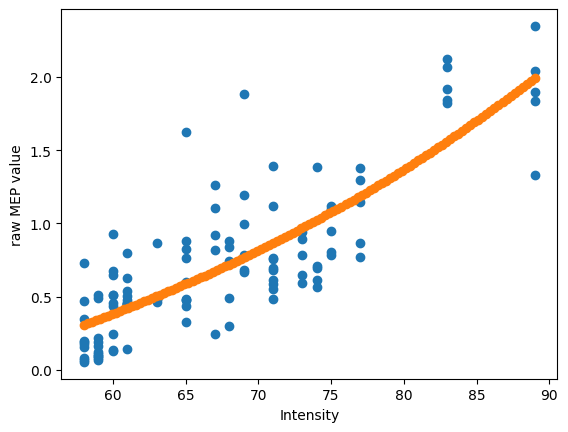

In [ ]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b
sub1 = df[df['Subj_ID']=='BME-04']['raw_MEP']
sub1 = sub1.astype(float)
sub2 = df[df['Subj_ID']=='BME-04']['raw_Intensity']
size1 = np.size(sub1)
X = sub2.tolist()
X = np.array([float(X) for X in X])

Y = sub1.tolist()
Y = np.array([float(Y) for Y in Y])
X = X.astype(int)
min = np.min(X)
max = np.max(X)
initial_guesses = [np.max(Y), np.median(X), 1, np.min(Y)]
popt, pcov = curve_fit(sigmoid, X, Y ,p0=initial_guesses,maxfev=20000)

x = np.linspace(min,max,113)
y = sigmoid(x, *popt)
plt.scatter(X, Y, label='data')
plt.scatter(x,y, label='fit')
plt.xlabel('Intensity')
plt.ylabel('raw MEP value')
plt.savefig('/content/drive/My Drive/subject sigmoid fit/sine_wave{i+1}.png')
r2 = r2_score(Y, y)